# NSEpy
NSEpy is a library to extract historical and realtime data from NSE's website. This Library aims to keep the API very simple. Python is a great tool for data analysis along with the scipy stack and the main objective of NSEpy is to provide analysis ready data-series for use with scipy stack.


To install NSEpy enter following command in terminal

# pip install nsepy


In [1]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
from matplotlib import pyplot

import matplotlib.pyplot as plt

from nsepy import get_history
from datetime import date


### Plotting TCS and INFY time series data with respect to Close, Open and Volume Feautre

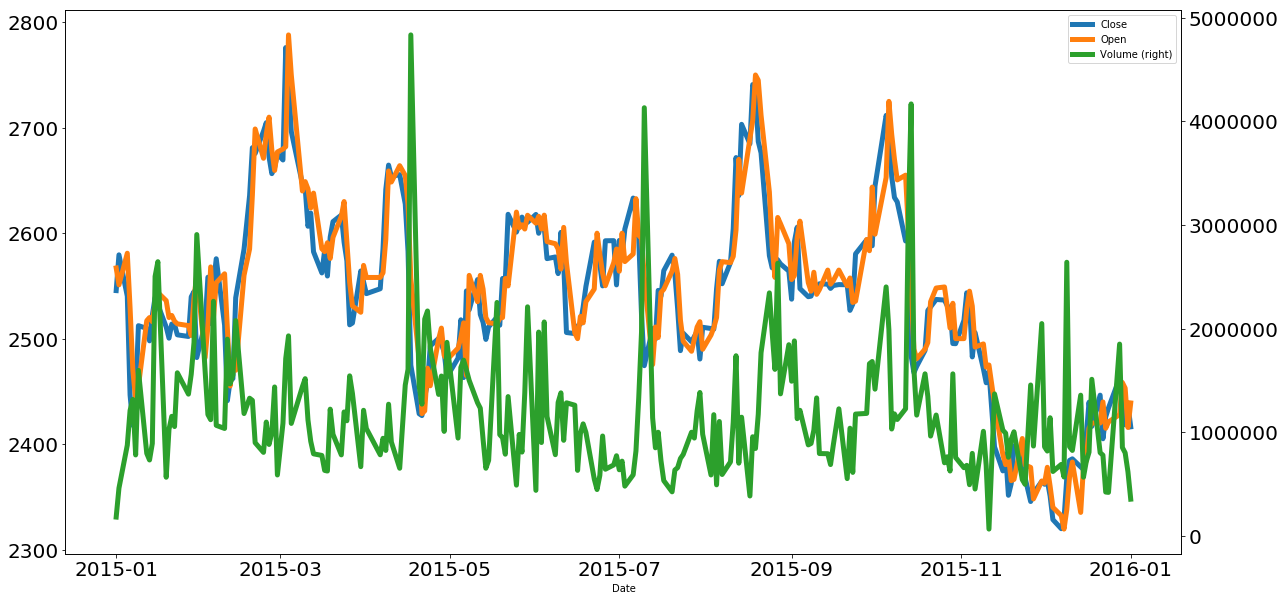

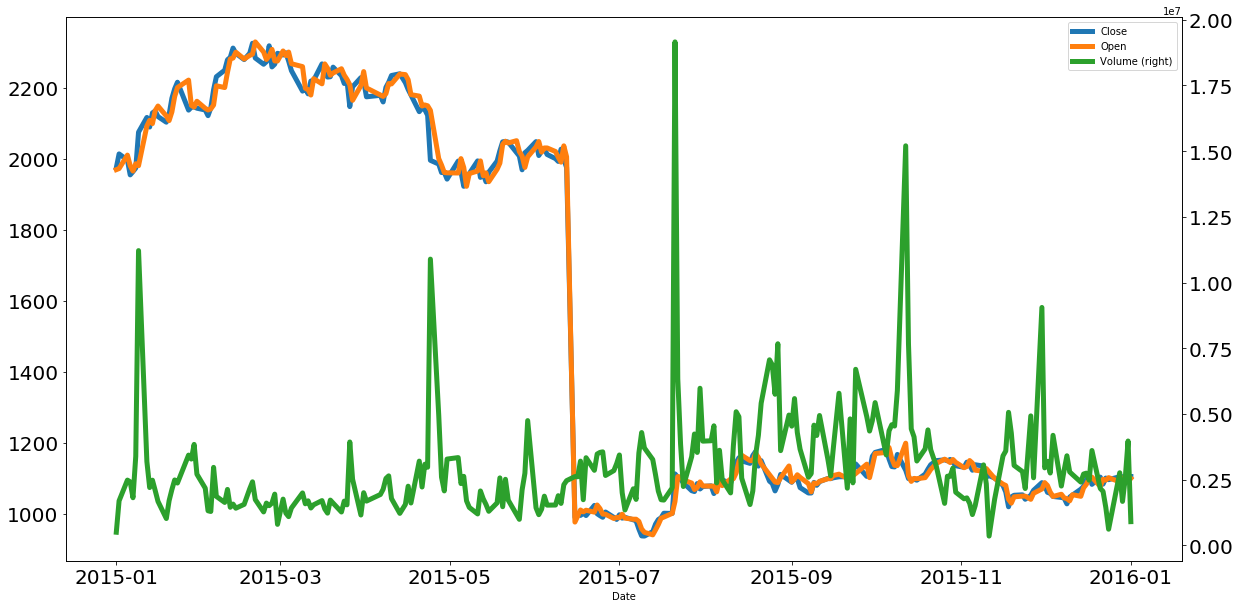

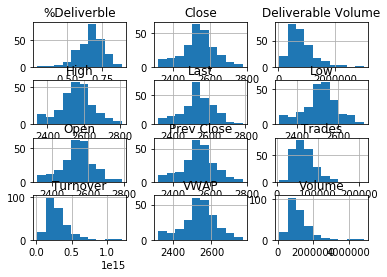

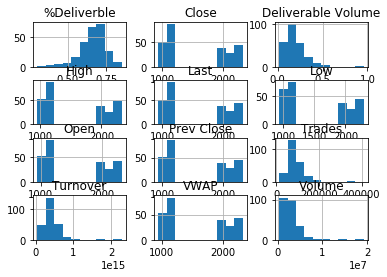

In [2]:
tcs_data = get_history(symbol="TCS", start=date(2015,1,1), end=date(2016,1,1))
tcs_data[['Close','Open','Volume']].plot(secondary_y="Volume",figsize=(20,10), linewidth=5, fontsize=20)

infy_data = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,1,1))
infy_data[['Close','Open','Volume']].plot(secondary_y="Volume",figsize=(20,10), linewidth=5, fontsize=20)

tcs_data.hist()
pyplot.show()

infy_data.hist()
pyplot.show()

### Getting TCS and INFY data last one years

In [3]:
tcs_data = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2016,1,10))
infy_data = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2016,1,10))


#### Print First Five days Data OF TCS 

In [4]:
tcs_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [5]:
infy_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [6]:
tcs_data.shape


(254, 14)

In [7]:
infy_data.shape

(254, 14)

## Statistics Description of TCS and INFY data 

In [8]:
tcs_data.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,2.540000e+02,254.000000,2.540000e+02,254.000000
mean,2534.646063,2538.575591,2559.779331,2510.926378,2534.380315,2534.013583,2534.756575,1.170236e+06,2.968038e+14,66428.421260,7.938873e+05,0.670013
std,88.927574,89.715335,92.857015,85.048907,89.047706,89.329420,89.052153,6.178610e+05,1.565493e+14,29012.533863,4.278968e+05,0.090520
min,2319.800000,2319.400000,2343.900000,2315.250000,2321.000000,2319.800000,2322.270000,6.758200e+04,1.667550e+13,5197.000000,3.400300e+04,0.288300
25%,2488.637500,2492.750000,2515.412500,2465.900000,2486.762500,2487.625000,2491.460000,7.828540e+05,1.955653e+14,44771.250000,4.886398e+05,0.611175
50%,2540.225000,2547.000000,2565.000000,2517.700000,2539.225000,2539.975000,2537.845000,1.031024e+06,2.631783e+14,61177.500000,7.009530e+05,0.685350
75%,2591.450000,2593.500000,2614.900000,2564.887500,2591.300000,2591.450000,2589.745000,1.384416e+06,3.538415e+14,82030.500000,9.907078e+05,0.725825
max,2776.000000,2788.000000,2812.100000,2721.900000,2785.100000,2776.000000,2763.040000,4.834371e+06,1.206435e+15,211247.000000,2.989132e+06,0.890100


In [9]:
infy_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,2.540000e+02,254.000000,2.540000e+02,254.000000
mean,1540.352362,1539.399016,1554.885630,1519.114567,1536.871063,1536.772638,1536.960079,2.960390e+06,4.186367e+14,91819.909449,1.924286e+06,0.660434
std,527.974513,529.115786,533.403779,522.746589,528.145890,528.114972,527.492364,2.026641e+06,2.695792e+14,50337.849381,1.108521e+06,0.087122
min,937.500000,941.000000,952.100000,932.650000,935.500000,937.500000,941.180000,3.536520e+05,3.923481e+13,13196.000000,1.662220e+05,0.300400
25%,1084.162500,1086.950000,1098.075000,1066.212500,1085.237500,1083.300000,1083.867500,1.722388e+06,2.817717e+14,62526.500000,1.136410e+06,0.615825
50%,1145.275000,1144.750000,1156.750000,1127.025000,1141.175000,1144.725000,1143.810000,2.516692e+06,3.597285e+14,79521.000000,1.704400e+06,0.674400
75%,2121.725000,2134.275000,2147.412500,2100.575000,2120.587500,2121.725000,2118.100000,3.536552e+06,4.902471e+14,105859.500000,2.460036e+06,0.721350
max,2324.700000,2328.500000,2336.000000,2292.050000,2323.200000,2324.700000,2322.170000,1.915506e+07,2.285439e+15,408583.000000,9.575992e+06,0.853200


### Ploting Time Series diff between TCS and INFY Close Feature

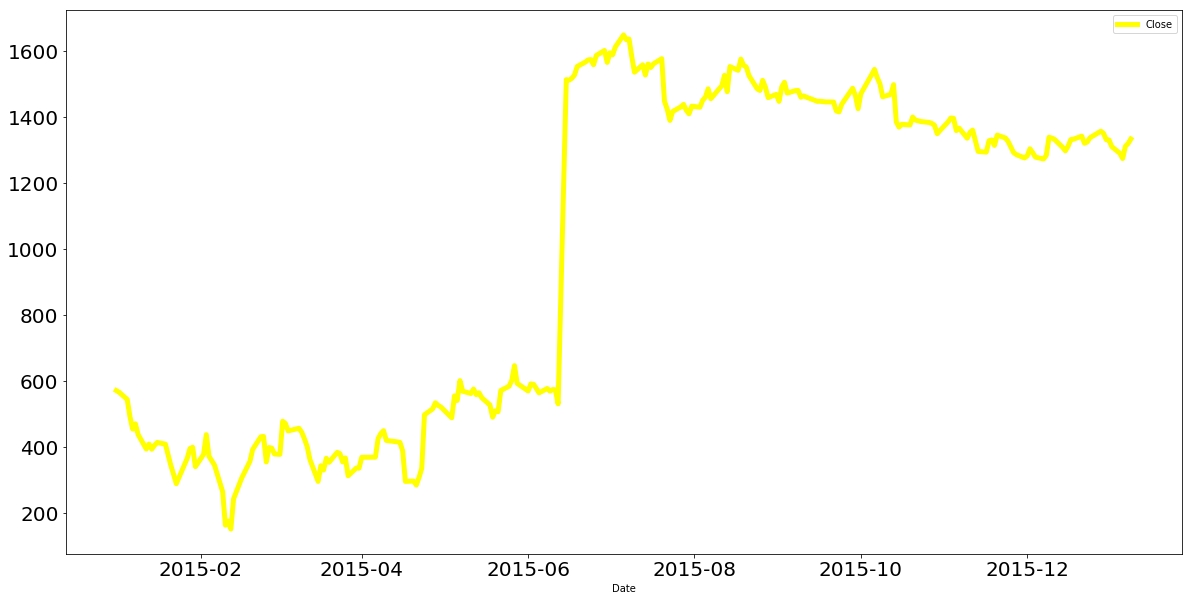

In [10]:
diff_close_series= tcs_data[['Close']] - infy_data[['Close']]
diff_close_series.plot(color='yellow',figsize=(20,10), linewidth=5, fontsize=20)

### Plotting Time Series diff between TCS and INFY Open Feature 

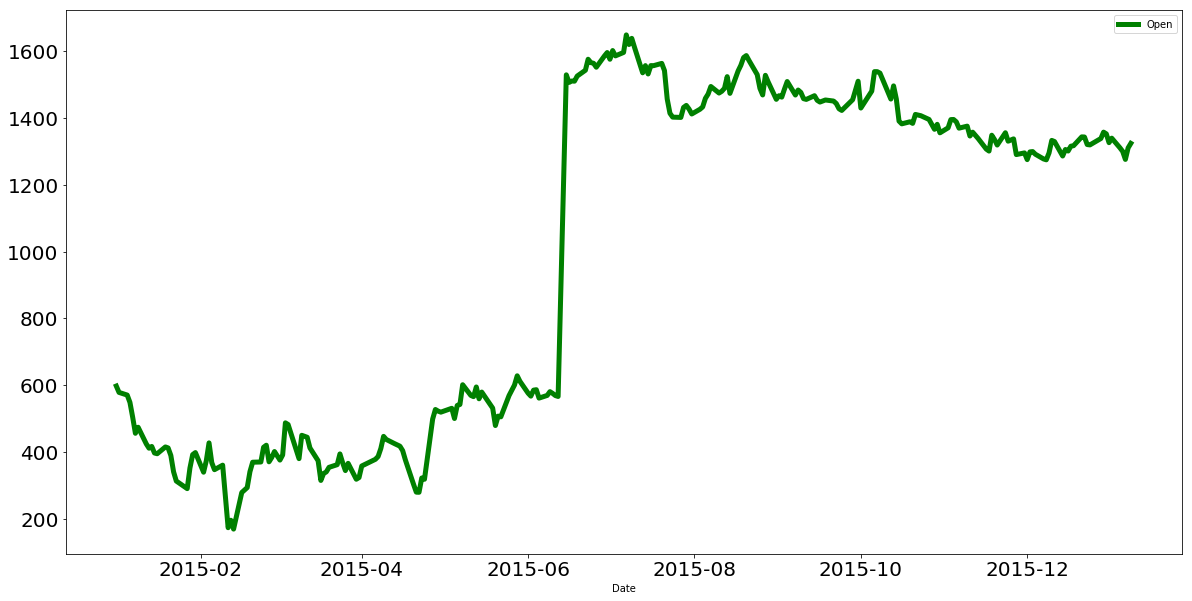

In [11]:
diff_open_series= tcs_data[['Open']] - infy_data[['Open']]
diff_open_series.plot(color='green',figsize=(20,10), linewidth=5, fontsize=20)

### Plotting Time Series diff between TCS and INFY Volume Feature

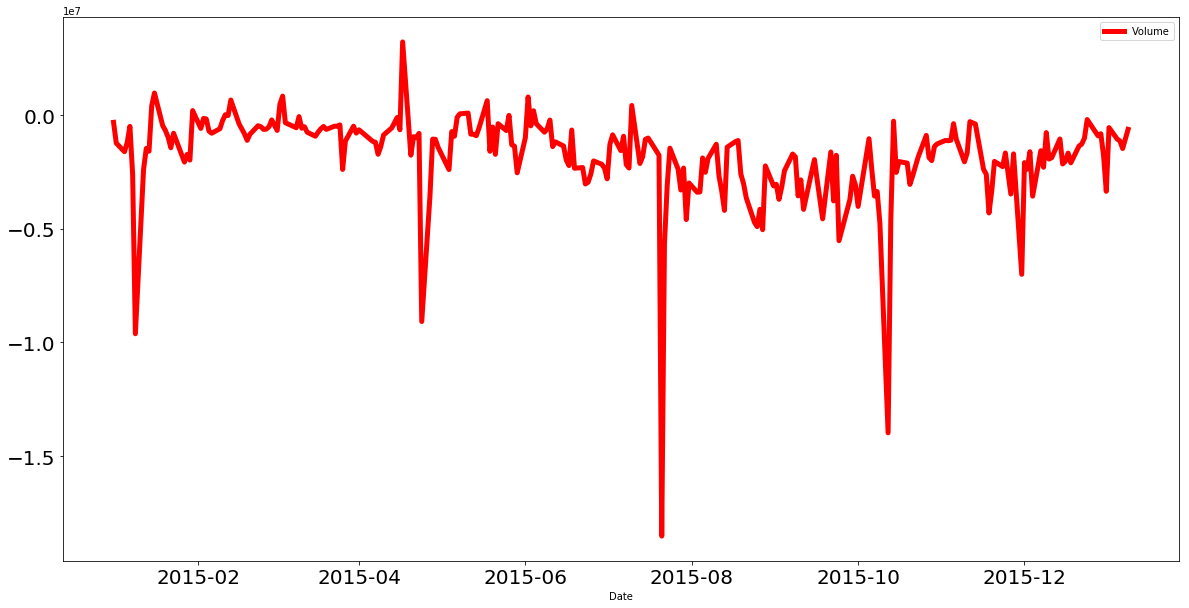

In [12]:
diff_open_series= tcs_data[['Volume']] - infy_data[['Volume']]
diff_open_series.plot(color='Red',figsize=(20,10), linewidth=5, fontsize=20)

### Time Series Plotting diff between TCS and INFY Turnover Feature

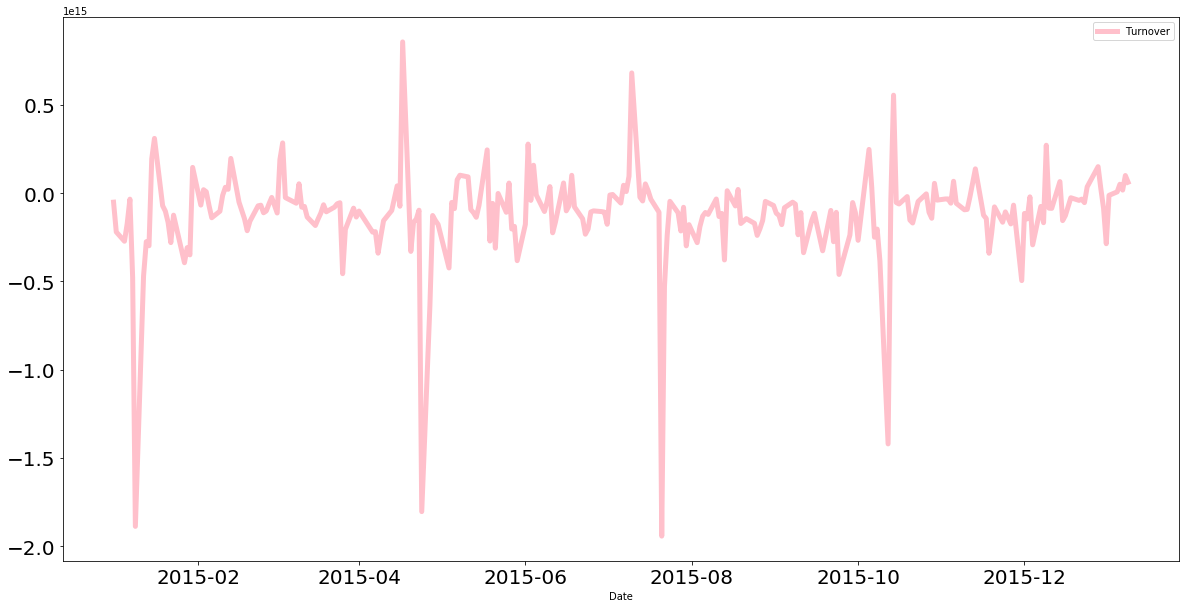

In [13]:
diff_open_series= tcs_data[['Turnover']] - infy_data[['Turnover']]
diff_open_series.plot(color='pink',figsize=(20,10), linewidth=5, fontsize=20)

##### DENSITY Plot of TCS Dataset

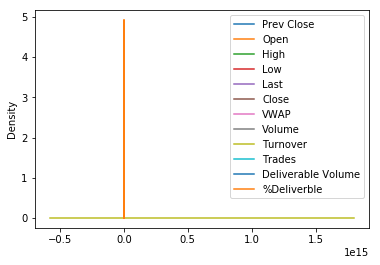

In [14]:
tcs_data.plot(kind='kde')
pyplot.show()

#### Density Plot of INFY dataset

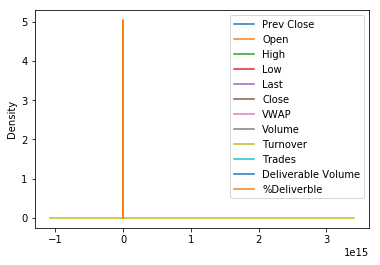

In [15]:
infy_data.plot(kind='kde')
pyplot.show()

####  Time Series Plotting TCS dataset all Feature

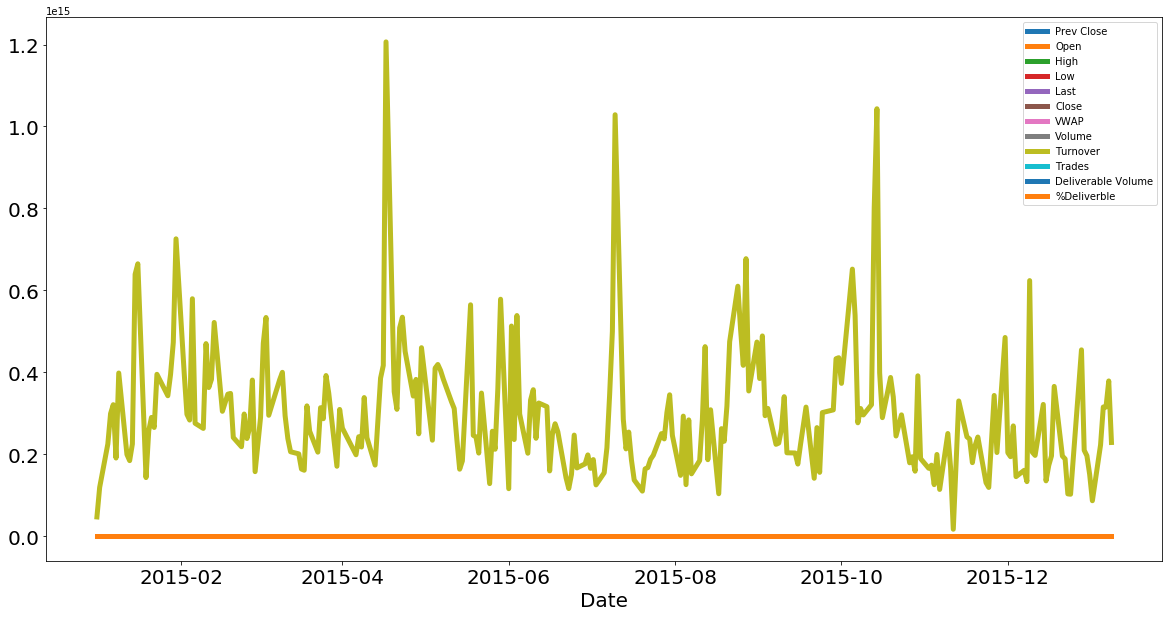

In [16]:
tcs_data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

### Rolling Window Time Series  for TCS Close Feature

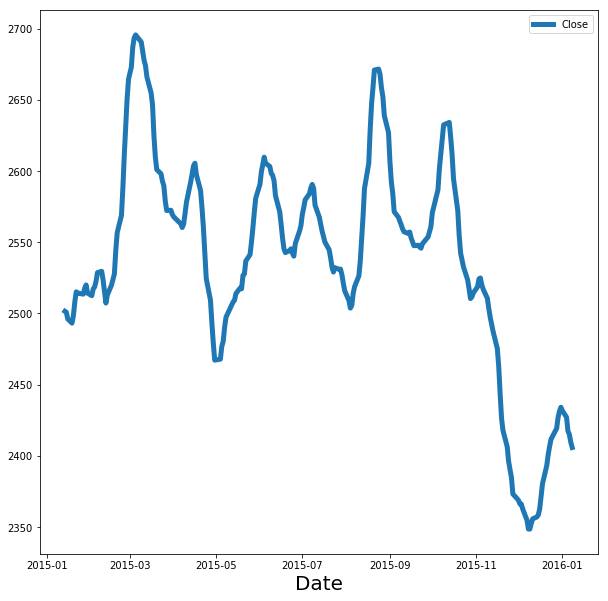

In [27]:
close_tcs = tcs_data[['Close']]
close_tcs.rolling(10).mean().plot(figsize=(10,10), linewidth=5, fontsize=10)
plt.xlabel('Date', fontsize=20);


### Rolling Window Time Series for INFY Close Feature

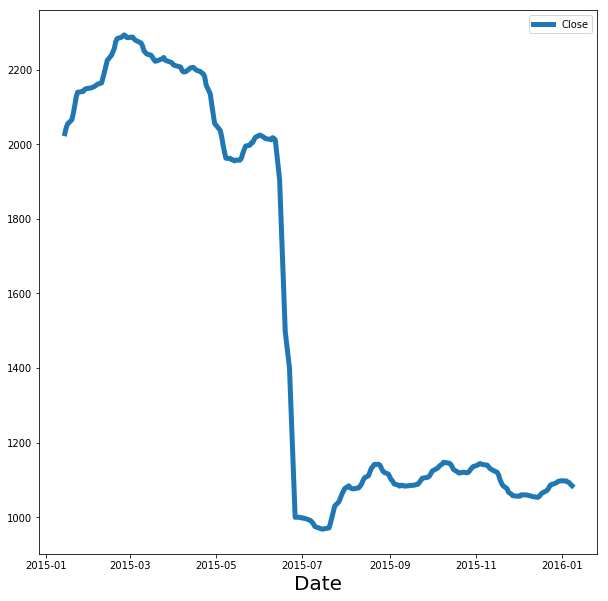

In [18]:
close_infy = infy_data[['Close']]
close_infy.rolling(10).mean().plot(figsize=(10,10), linewidth=5, fontsize=10)
plt.xlabel('Date', fontsize=20);


### Plotting Rolling Window Time Series for TCS  and INFY Close Feature.

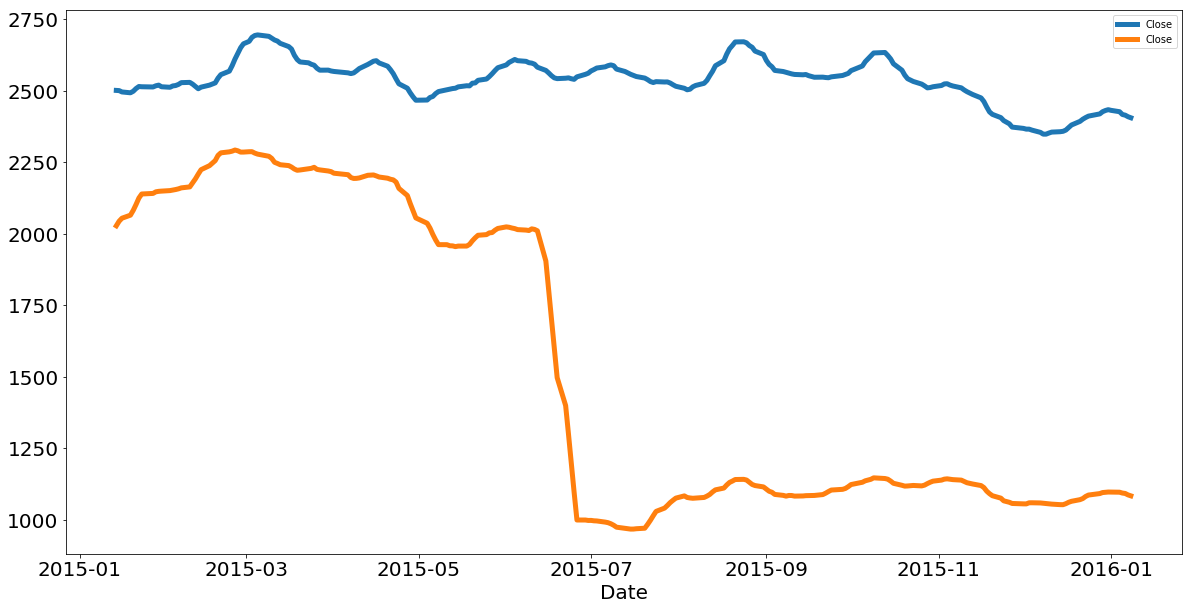

In [19]:
df_rm = pd.concat([close_tcs.rolling(10).mean(), close_infy.rolling(10).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

### Correlation matrix  of TCS dataset

In [20]:
tcs_data.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.989616,0.969086,0.960658,0.931070,0.933264,0.959051,0.083198,0.144861,0.152099,0.091344,-0.014524
Open,0.989616,1.000000,0.974919,0.968937,0.939296,0.941491,0.965942,0.079854,0.142205,0.165285,0.094357,0.001786
High,0.969086,0.974919,1.000000,0.974708,0.975636,0.976479,0.990387,0.103995,0.168741,0.183561,0.113240,-0.019060
Low,0.960658,0.968937,0.974708,1.000000,0.978988,0.981771,0.990383,-0.008156,0.056658,0.075737,0.015038,0.006684
Last,0.931070,0.939296,0.975636,0.978988,1.000000,0.998254,0.990015,0.019088,0.083750,0.099706,0.036283,-0.017632
Close,0.933264,0.941491,0.976479,0.981771,0.998254,1.000000,0.991759,0.017804,0.082773,0.098176,0.032986,-0.019554
VWAP,0.959051,0.965942,0.990387,0.990383,0.990015,0.991759,1.000000,0.032401,0.097911,0.116577,0.048331,-0.008449
Volume,0.083198,0.079854,0.103995,-0.008156,0.019088,0.017804,0.032401,1.000000,0.997405,0.770070,0.951720,0.176174
Turnover,0.144861,0.142205,0.168741,0.056658,0.083750,0.082773,0.097911,0.997405,1.000000,0.774987,0.952414,0.180814
Trades,0.152099,0.165285,0.183561,0.075737,0.099706,0.098176,0.116577,0.770070,0.774987,1.000000,0.738359,0.210218


### Correlation matrix INFY dataset

In [21]:
infy_data.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.992789,0.992455,0.992293,0.992057,0.991964,0.992414,-0.347467,0.119943,-0.208975,-0.379805,0.244859
Open,0.992789,1.000000,0.999537,0.999394,0.998998,0.998955,0.999412,-0.342153,0.127943,-0.205615,-0.373218,0.253432
High,0.992455,0.999537,1.000000,0.999316,0.999536,0.999525,0.999785,-0.330372,0.140344,-0.194502,-0.364920,0.245445
Low,0.992293,0.999394,0.999316,1.000000,0.999586,0.999581,0.999727,-0.354082,0.113039,-0.218847,-0.382127,0.257939
Last,0.992057,0.998998,0.999536,0.999586,1.000000,0.999980,0.999844,-0.342935,0.125965,-0.207818,-0.374045,0.251161
Close,0.991964,0.998955,0.999525,0.999581,0.999980,1.000000,0.999853,-0.343069,0.125868,-0.207890,-0.374316,0.250646
VWAP,0.992414,0.999412,0.999785,0.999727,0.999844,0.999853,1.000000,-0.341496,0.127875,-0.206221,-0.373335,0.249972
Volume,-0.347467,-0.342153,-0.330372,-0.354082,-0.342935,-0.343069,-0.341496,1.000000,0.846506,0.869832,0.924262,-0.175404
Turnover,0.119943,0.127943,0.140344,0.113039,0.125965,0.125868,0.127875,0.846506,1.000000,0.809388,0.727849,-0.105587
Trades,-0.208975,-0.205615,-0.194502,-0.218847,-0.207818,-0.207890,-0.206221,0.869832,0.809388,1.000000,0.767351,-0.173984


### Autocorrelation Plot with Respect Close feature

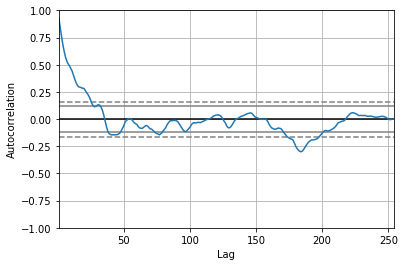

In [22]:
pd.plotting.autocorrelation_plot(close_tcs);

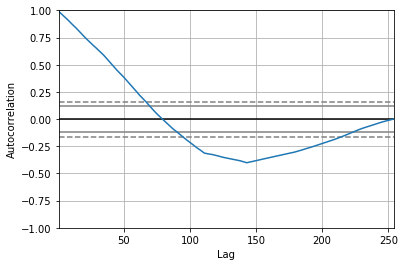

In [23]:
pd.plotting.autocorrelation_plot(close_infy);